In [2]:
! pip install kaggle 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=7ef6913db31a9c2f71992a4d7d2d70987751debeeab2ffe0b978111fdd27c326
  Stored in directory: /Users/jieun/Library/Caches/pip/wheels/89/bc/52/0d140fc172783e1e72e3af4dfc13015dc154527fafb95e65cd
Successfully built kaggle


In [4]:
# !kaggle datasets download -d nanditapore/healthcare-diabetes

Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
License(s): Apache 2.0
  0%|                                               | 0.00/26.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 26.7k/26.7k [00:00<00:00, 21.1MB/s]


In [6]:
# !unzip predict-customer-purchase-behavior-dataset.zip

unzip:  cannot find or open predict-customer-purchase-behavior-dataset.zip, predict-customer-purchase-behavior-dataset.zip.zip or predict-customer-purchase-behavior-dataset.zip.ZIP.


column 설명 
- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skinfold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg / height in m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.
- Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

In [98]:
import pandas as pd 

# read CSV 
data = pd.read_csv("./data/Healthcare-Diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [100]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [102]:
#기초 통계 확인
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [104]:
#결측값 확인 
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [108]:
import numpy as np
# 결측값 추가 함수
def add_missing_values(df, col_name, missing_frac):
    """
    특정 열에 지정된 비율의 결측값을 추가합니다.

    :param df: 데이터프레임
    :param col_name: 결측값을 추가할 열 이름
    :param missing_frac: 결측값 비율 (0.0 ~ 1.0)
    """
    np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
    n_rows = df.shape[0] # 데이터프레임의 행 수
    n_missing = int(n_rows * missing_frac) # 결측값을 추가할 행의 수를 계산

    missing_indices = np.random.choice(n_rows, n_missing, replace=False) # 결측값을 추가할 행의 인덱스를 무작위로 선택
    df.loc[missing_indices, col_name] = np.nan # 선택된 인덱스의 열 값을 NaN으로 설정

In [110]:
# 결측값 추가
add_missing_values(data, 'Pregnancies', 0.4)  # Pregnancies 열에 10% 결측값 추가
add_missing_values(data, 'DiabetesPedigreeFunction', 0.1)  # Age 열에 10% 결측값 추가

In [112]:
#결측값 다시 확인 
data.isnull().sum()

Id                             0
Pregnancies                 1107
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction     276
Age                            0
Outcome                        0
dtype: int64

In [114]:
data.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,NaN,75,64,24,55,29.7,0.370,33,0
2764,2765,NaN,179,72,42,130,32.7,0.719,36,1
2765,2766,6.0,85,78,0,0,31.2,0.382,42,0
2766,2767,0.0,129,110,46,130,67.1,0.319,26,1
2767,2768,NaN,81,72,15,76,30.1,NaN,25,0


In [116]:
# 범주형 데이터 인위적으로 추가(GENDER)
data['Gender'] = np.where(data['Pregnancies'].isnull(), 'M', 'F') # 임신 횟수가 없으면 남자, 아니면 여자로 배정하기 

# 남자 임신 횟수 0으로 
data.loc[data['Pregnancies'].isnull()] = 0

In [91]:
data.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
2763,0,0.0,0,0,0,0,0.0,0.000,0.0,0,F
2764,0,0.0,0,0,0,0,0.0,0.000,0.0,0,F
2765,2766,6.0,85,78,0,0,31.2,0.382,42.0,0,F
2766,2767,0.0,129,110,46,130,67.1,0.319,26.0,1,F
2767,0,0.0,0,0,0,0,0.0,0.000,0.0,0,F


# 데이터 전처리 

In [96]:
# 결측값 처리: DiabetesPedigreeFunction가 표준편차가 가장 적어서 평균값으로 대체함. 
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean(), inplace = True)

0       50.0
1       31.0
2       32.0
3       21.0
4       33.0
        ... 
2763     0.0
2764     0.0
2765    42.0
2766    26.0
2767     0.0
Name: Age, Length: 2768, dtype: float64

## 데이터 스케일링 
- normalization: 정규분포를 따르는 데이터 일 때 사용 -> 정규성 검증 선행
- min-max scaler: 정규 분포를 따르지 않는 데이터일 때 사용 

In [127]:
data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Gender'],
      dtype='object')

## 정규성 검증(normality test)

## QQ plot(시각화)
- 대각선과 일치하면 normality 따른다. 

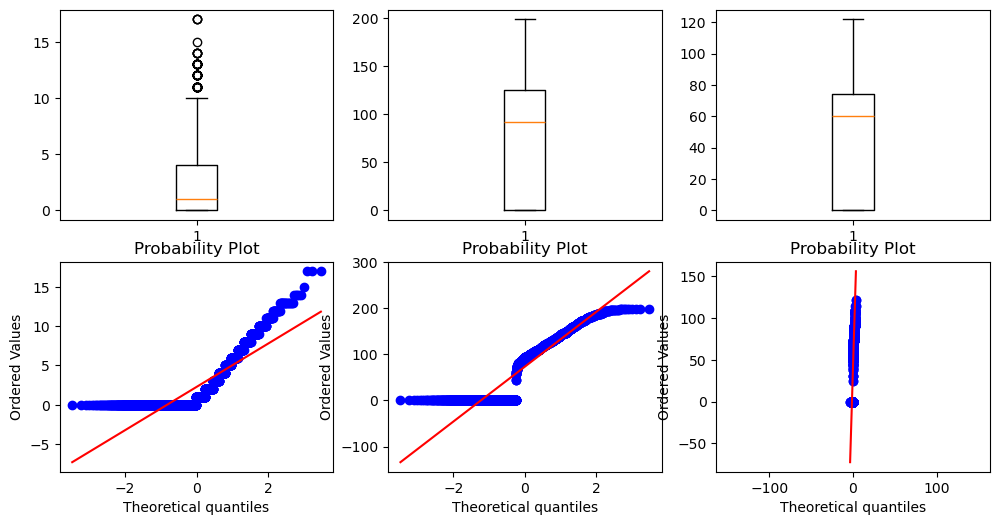

In [129]:
from scipy.stats import probplot
import matplotlib.pyplot as plt 

x1, x2, x3 =  data['Pregnancies'], data['Glucose'], data['BloodPressure'] #, data['SkinThickness'], data['Insulin'], data['BMI'], data['DiabetesPedigreeFunction']

#플랏 크기 지정 
f, axes = plt.subplots(2, 3, figsize=(12, 6))

#첫번째 데이터 
axes[0][0].boxplot(x1)
probplot(x1, plot=axes[1][0])

#두번째 데이터 
axes[0][1].boxplot(x2)
probplot(x2, plot=axes[1][1])

#세번째 데이터 
axes[0][2].boxplot(x3)
probplot(x3, plot=axes[1][2])

#plotting 
plt.axis("equal")
plt.show()

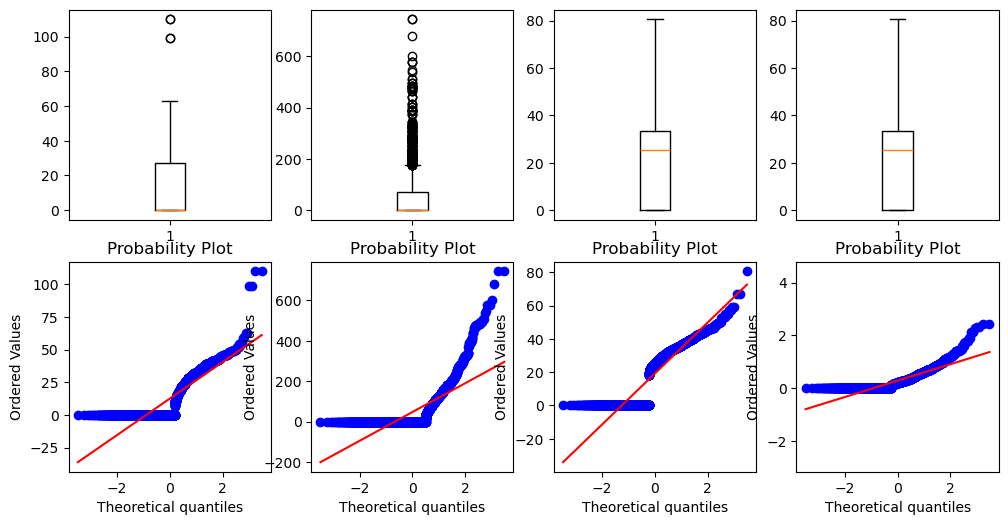

In [131]:
x1, x2, x3, x4 =  data['SkinThickness'], data['Insulin'], data['BMI'], data['DiabetesPedigreeFunction']

#플랏 크기 지정 
f, axes = plt.subplots(2, 4, figsize=(12, 6))

#첫번째 데이터 
axes[0][0].boxplot(x1)
probplot(x1, plot=axes[1][0])

#두번째 데이터 
axes[0][1].boxplot(x2)
probplot(x2, plot=axes[1][1])

#세번째 데이터 
axes[0][2].boxplot(x3)
probplot(x3, plot=axes[1][2])

#세번째 데이터 
axes[0][3].boxplot(x3)
probplot(x4, plot=axes[1][3])

#plotting 
plt.axis("equal")
plt.show()

## Anderson Test
- 주어진 데이터 분포가 norm dist.를 따르는지 통계적으로 검증
- 귀무 가설(null hypothsis) : 주어진 데이터 분포가 특정 분포(e.g. norm dist)를 따른다.
- 결과 해석: p-value가 유의 수준 검정 통계치보다 크면 귀무가설 기각 -> 즉 특정 분포를 따르지 않음. 

In [139]:
## 작성 중 
from scipy.stats import anderson

# Anderson-Darling Test 
anderson_result1 = anderson(x1)
anderson_result2 = anderson(x2)
anderson_result3 = anderson(x3)

print(f'검정 통계치 : {anderson_result1[0]}')
print(f'임계지점의 통계치 : {anderson_result1[1]}')
print(f'각 임계 지점의 P-value : {anderson_result1[2]}')


검정 통계치 : 302.859780462471
임계지점의 통계치 : [0.575 0.655 0.786 0.917 1.09 ]
각 임계 지점의 P-value : [15.  10.   5.   2.5  1. ]
